<a href="https://colab.research.google.com/github/jackie-Gung/Colab_ESAA/blob/main/2022_03_28_%EC%84%B8%EC%85%98(2)_chipotle_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [ ]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

### Step 4. See the first 10 entries

In [ ]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [ ]:
item_list = chipo.groupby(by = 'item_name').quantity.count()
item_list.sort_values(ascending = False, inplace = True)
item = item_list[0:5]
item

item_name
Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: quantity, dtype: int64

<BarContainer object of 5 artists>

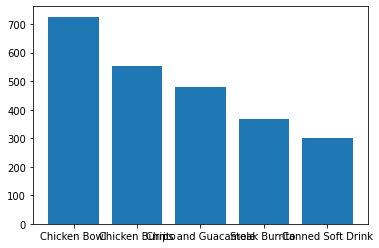

In [ ]:
# 기본 틀 생성
fig = plt.figure()
fig.tight_layout()
ax = fig.add_subplot(1, 1, 1)

# 열 데이터를 전달하여 히스토그램 그리기
plt.bar(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole', 'Steak Burrito ', 'Canned Soft Drink'],item)

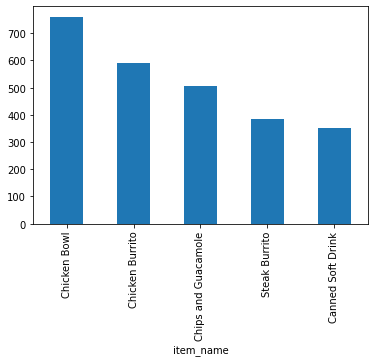

In [ ]:
top_5 = chipo.groupby('item_name').quantity.sum().sort_values(ascending = False)[0:5]
top_5.plot(kind='bar') # kind

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [ ]:
chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:]))

In [ ]:
price = chipo.groupby('order_id').sum()
price

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


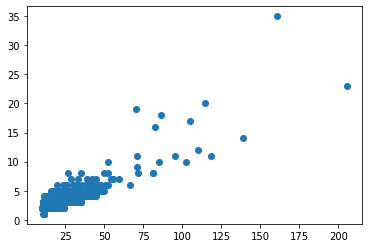

In [ ]:
# 기본 틀과 그래프 격자 구성
scatter_plot = plt.figure( )
ax = scatter_plot.add_subplot(1, 1, 1)

# scatter 메서드
ax.scatter(price['item_price'], price['quantity'])

### Step 7. BONUS: Create a question and a graph to answer your own question.

In [ ]:
# skip